# Otsu binarising/auto-labelling

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

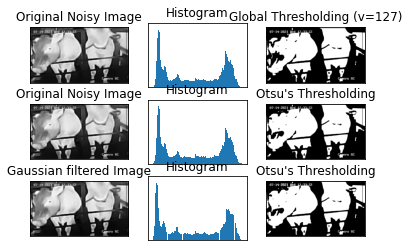

-1

In [8]:
img = cv2.imread('data/otsu/thermal/greyscale/192.168.88.175_02_20210714123323768.jpg',0)
img2 = cv2.imread('data/otsu/thermal/greyscale/192.168.88.175_02_20210714123327392.jpg',0)
img3 = cv2.imread('data/otsu/thermal/greyscale/192.168.88.175_02_20210714123327929.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imshow("1", th1)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

cv2.imshow("2", th2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

cv2.imshow("3", th3)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

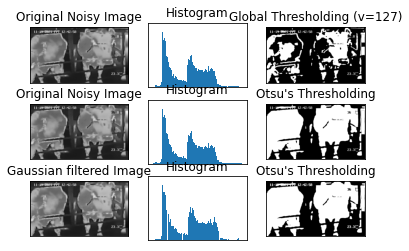

-1

In [9]:
img = cv2.imread('dataset/01.04.22/thermal/4be7463543c11e47ad267a6575a72e7e-2.jpg',0)
img2 = cv2.imread('dataset/01.04.22/thermal/4bd50e7bd1bf772a71955d845bbd1052-2.jpg',0)
img3 = cv2.imread('dataset/01.04.22/thermal/0eb90898ef56c372715181ad0c395a3f-2.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imshow("1", th1)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

cv2.imshow("2", th2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

cv2.imshow("3", th3)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)